In [684]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-bazhenov/Titanic.csv


In [685]:
df = pd.read_csv('/kaggle/input/titanic-bazhenov/Titanic.csv')

In [686]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [687]:
df.shape

(891, 12)

In [688]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [690]:
categorical_cols

Index([], dtype='object')

Преобразует категориальные столбцы в числовые, присваивая уникальный целочисленный идентификатор каждому уникальному значению в столбце, и сохраняет энкодеры для возможного обратного преобразования.

In [691]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipykernel_30/1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


Заполняет пропущенные значения (NaN) в столбце 'Age' медианным значением возраста, изменяя исходный DataFrame на месте.

In [692]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [693]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [694]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [695]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


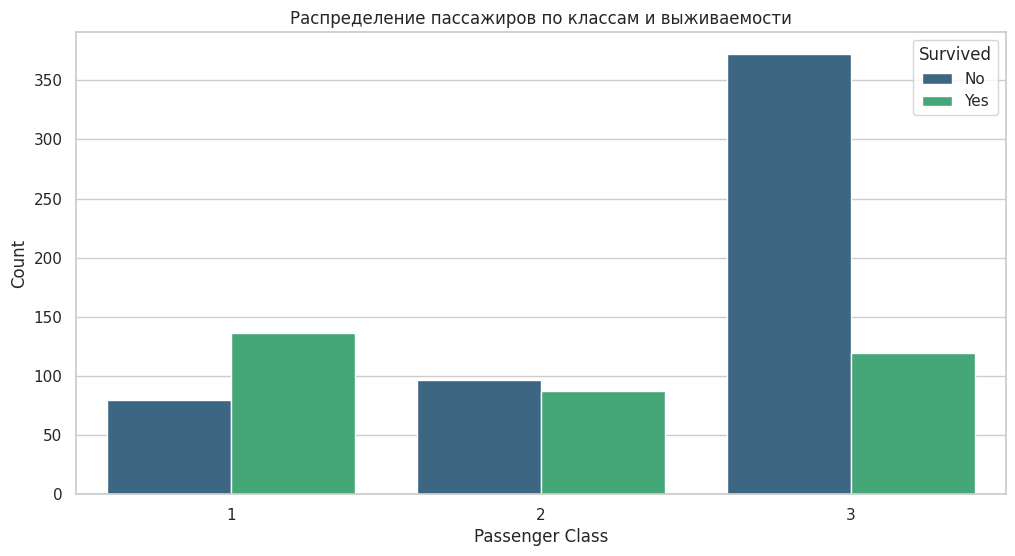

In [696]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Распределение пассажиров по классам и выживаемости')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Визуализирует распределение пассажиров по классам (Pclass) и выживанию (Survived) с помощью графика столбцов, где каждый класс представлен по оси X, а количество пассажиров отображается по оси Y. Цвета столбцов различаются в зависимости от того, выжил пассажир или нет, что позволяет легко оценить влияние класса на выживаемость.

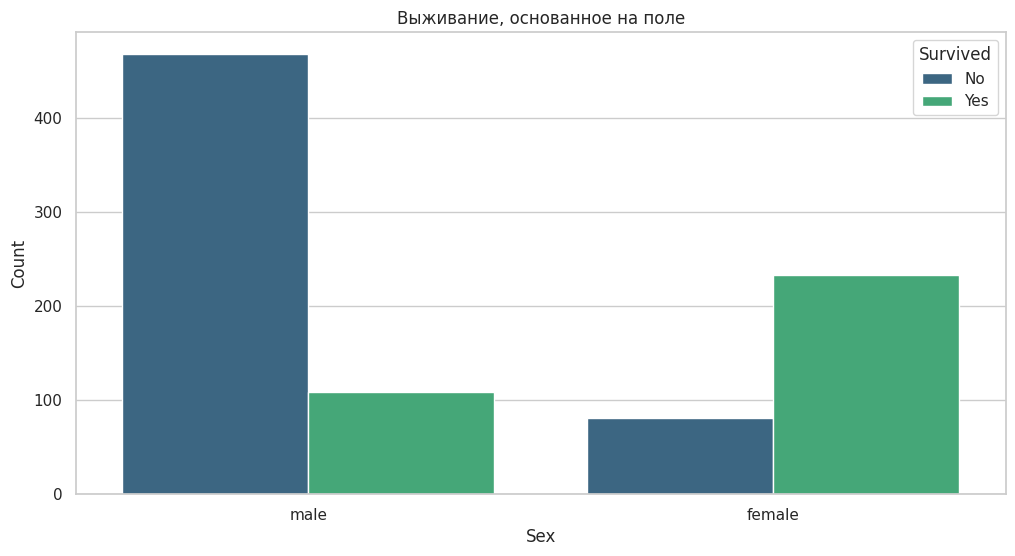

In [697]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis')
plt.title('Выживание, основанное на поле')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



Визуализирует количество выживших и невыживших пассажиров в зависимости от пола (Sex) с помощью графика столбцов, где ось X представляет пол, а ось Y показывает количество пассажиров. Цвета столбцов различаются по выживанию, что позволяет оценить влияние пола на вероятность выживания.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

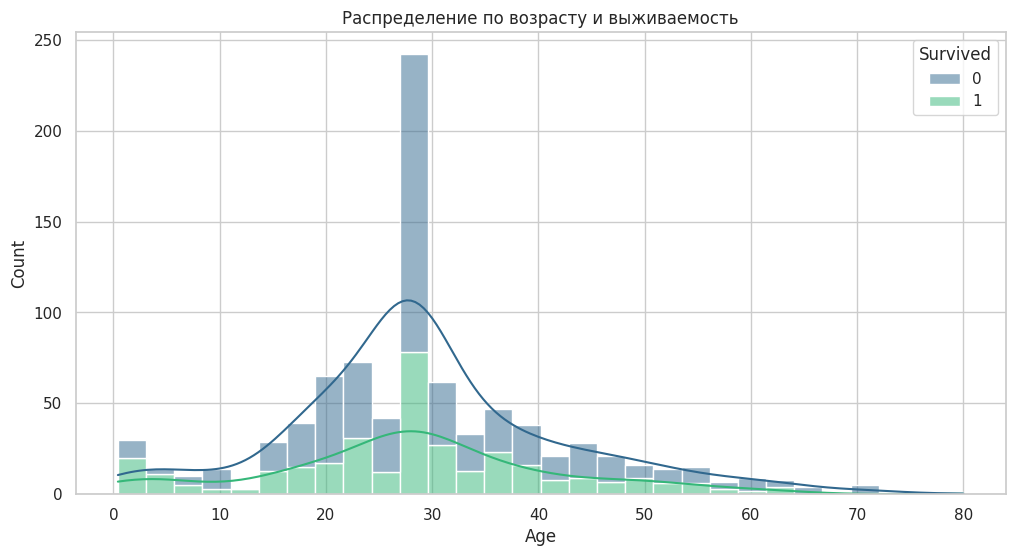

In [698]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True, palette='viridis', bins=30)
plt.title('Распределение по возрасту и выживаемость')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Визуализирует распределение возрастов пассажиров с учетом выживания с помощью гистограммы, где ось X представляет возраст, а ось Y показывает количество пассажиров. Гистограмма отображает данные по выживанию в виде стеков, а также включает кривую плотности, что позволяет оценить влияние возраста на вероятность выживания.

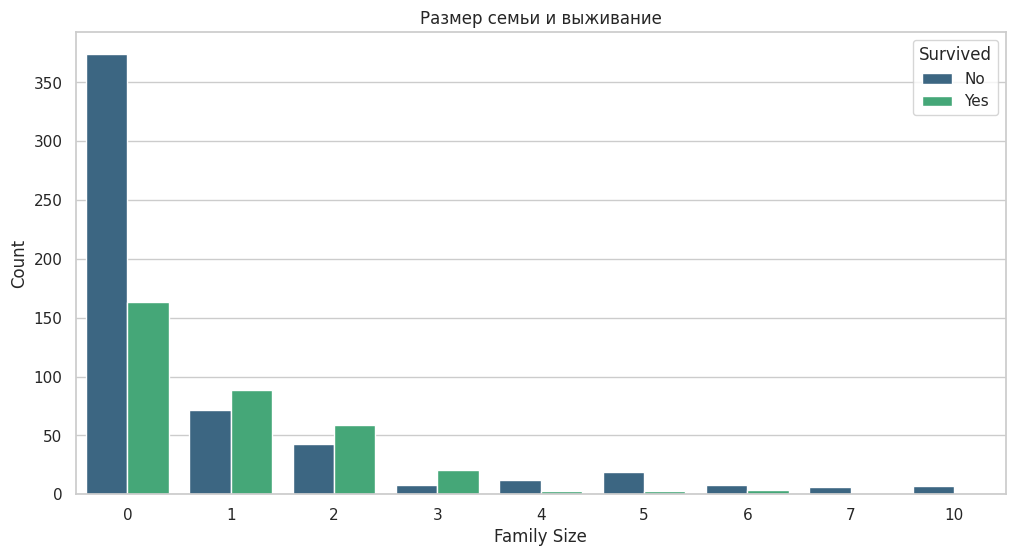

In [699]:
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='viridis')
plt.title('Размер семьи и выживание')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Создает новый столбец 'FamilySize', который представляет собой сумму столбцов 'SibSp' (количество братьев/сестер и супругов) и 'Parch' (количество родителей и детей). Затем визуализируется распределение выживаемости в зависимости от размера семьи с помощью графика столбцов, где ось X представляет размер семьи, а ось Y показывает количество пассажиров, разделенных по выживанию.

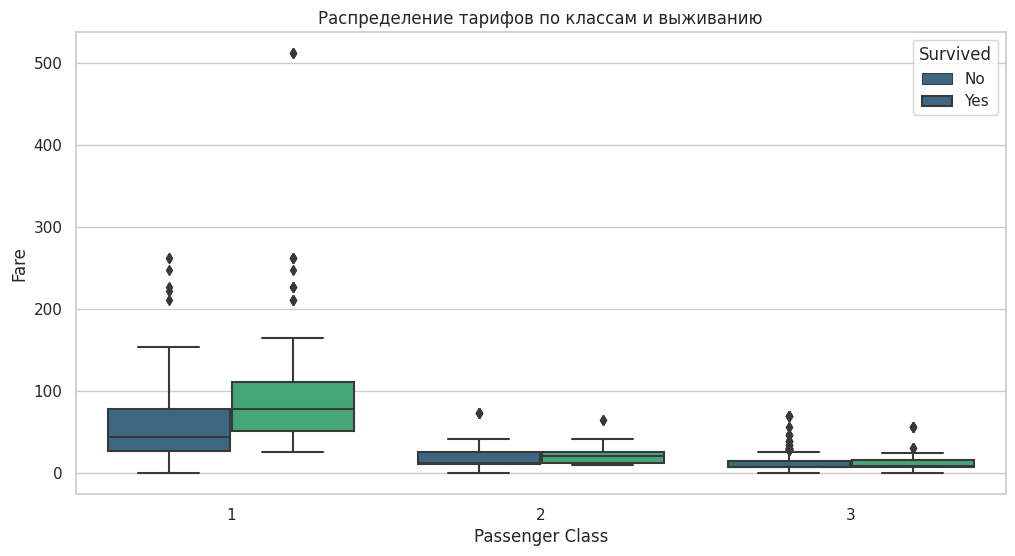

In [700]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='viridis')
plt.title('Распределение тарифов по классам и выживанию')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Визуализирует распределение тарифов (Fare) по классам пассажиров (Pclass) с учетом выживания с помощью боксплота. Ось X представляет класс пассажира, ось Y показывает тариф, а цветовая кодировка различает выживших и невыживших, что позволяет оценить влияние класса и тарифа на вероятность выживания.

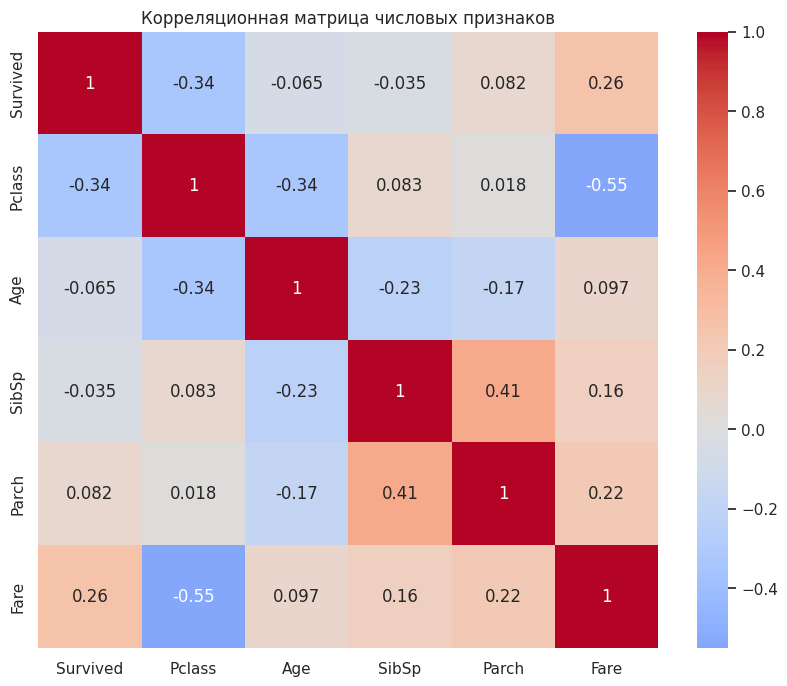

In [701]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

Вычисляет и визуализирует корреляционную матрицу для числовых признаков в DataFrame, показывая взаимосвязи между переменными, такими как выживаемость, класс, возраст, количество братьев/сестер и тариф. Цветовая кодировка и аннотации помогают быстро оценить степень и направление корреляции между признаками.

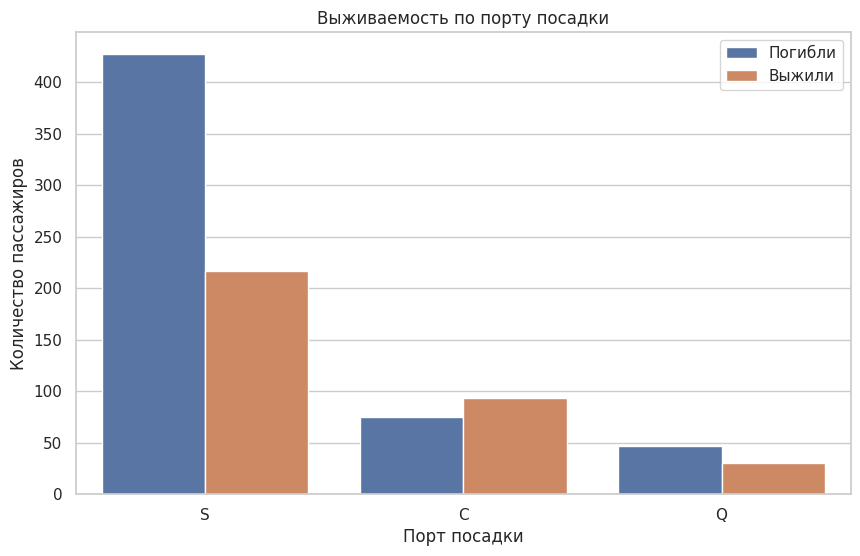

In [702]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Выживаемость по порту посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.legend(labels=['Погибли', 'Выжили'])
plt.show()

Визуализирует количество пассажиров, выживших и не выживших, в зависимости от порта посадки (Embarked) с помощью графика столбцов. Ось X представляет порты посадки, а цветовая кодировка различает выживших и погибших, что позволяет оценить влияние порта посадки на вероятность выживания.

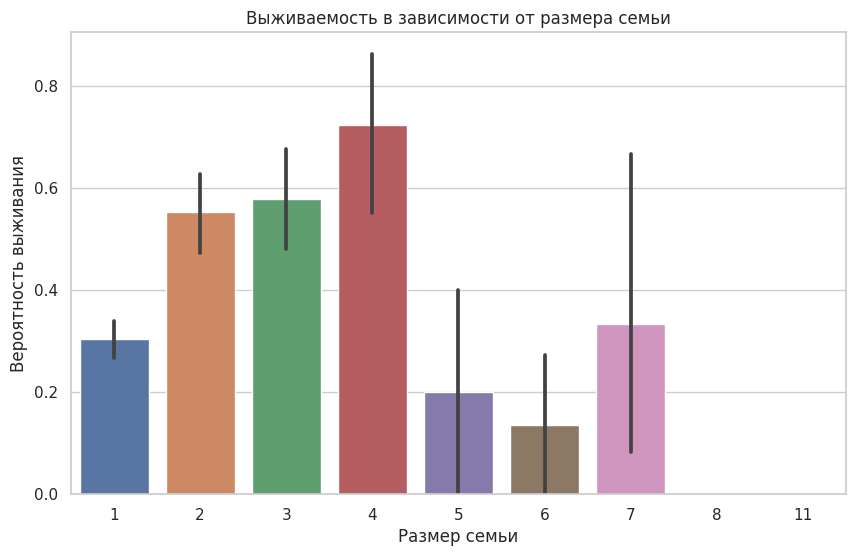

In [703]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Выживаемость в зависимости от размера семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Вероятность выживания')
plt.show()

Создает новый столбец 'FamilySize', который вычисляет размер семьи для каждого пассажира, складывая количество братьев/сестер и супругов ('SibSp') с количеством родителей и детей ('Parch') и добавляя 1 для учета самого пассажира. Затем визуализируется вероятность выживания в зависимости от размера семьи с помощью столбчатой диаграммы, где ось X представляет размер семьи, а ось Y показывает среднюю вероятность выживания.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


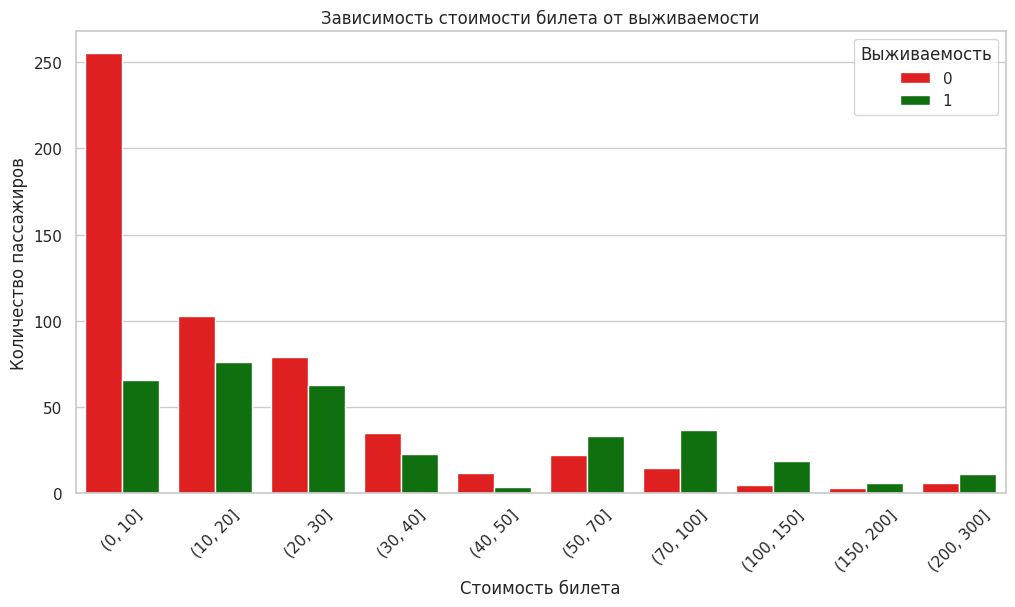

In [704]:
bins = [0, 10, 20, 30, 40, 50, 70, 100, 150, 200, 300]
df['Fare_binned'] = pd.cut(df['Fare'], bins=bins)

plt.figure(figsize=(12, 6))
sns.countplot(x='Fare_binned', hue='Survived', data=df, palette={0: 'red', 1: 'green'})

plt.title('Зависимость стоимости билета от выживаемости')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.legend(title='Выживаемость', loc='upper right')
plt.show()
labels = [10, 30, 50, 70, 90, 125, 175, 250, 450, 600]



Создает категории для стоимости билетов ('Fare') с помощью функции pd.cut(), определяя диапазоны значений в списке 'bins'. Затем визуализируется количество пассажиров в каждой категории стоимости с учетом их выживаемости с помощью графика столбцов. Цветовая кодировка различает выживших и погибших пассажиров, что позволяет оценить влияние стоимости билета на вероятность выживания.

In [705]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,"(0, 10]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(70, 100]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(0, 10]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(50, 70]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(0, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,"(10, 20]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,"(20, 30]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4,"(20, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,"(20, 30]"


In [706]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,...,Title_Mr,Title_Mrs,Title_Other,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,FareGroup_Mid-Low,FareGroup_Mid-High,FareGroup_High,Fare_binned
0,1,0,3,22.000000,1,0,7.2500,2,0,1,...,1,0,0,0,1,0,0,0,0,0
1,2,1,1,38.000000,1,0,71.2833,2,0,0,...,0,1,0,0,1,0,0,0,1,6
2,3,1,3,26.000000,0,0,7.9250,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4,1,1,35.000000,1,0,53.1000,2,0,0,...,0,1,0,0,1,0,0,0,1,5
4,5,0,3,35.000000,0,0,8.0500,1,1,1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,1,1,...,0,0,1,0,1,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,1,0,...,0,0,0,0,1,0,0,1,0,2
888,889,0,3,29.699118,1,2,23.4500,4,0,0,...,0,0,0,0,0,0,0,1,0,2
889,890,1,1,26.000000,0,0,30.0000,1,1,1,...,1,0,0,0,1,0,0,1,0,2


In [707]:
df = titanic_data

In [708]:
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoders = {}

Выбирает все категориальные столбцы из DataFrame 'df', включая столбцы с типами данных 'object', 'bool' и 'category', и сохраняет их имена в переменной 'categorical_cols'. Также создается пустой словарь 'label_encoders', который будет использоваться для хранения экземпляров кодировщиков меток (LabelEncoder) для каждого категориального столбца.

In [709]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Применяет кодировщик меток (LabelEncoder) к каждому категориальному столбцу в DataFrame 'df', преобразуя уникальные категориальные значения в числовые метки. Каждое значение в столбце заменяется на соответствующий целочисленный код, а экземпляры кодировщиков сохраняются в словаре 'label_encoders' для возможного обратного преобразования в будущем.

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   FamilySize          891 non-null    int64  
 8   IsAlone             891 non-null    int64  
 9   Sex_male            891 non-null    int64  
 10  Embarked_Q          891 non-null    int64  
 11  Embarked_S          891 non-null    int64  
 12  Title_Miss          891 non-null    int64  
 13  Title_Mr            891 non-null    int64  
 14  Title_Mrs           891 non-null    int64  
 15  Title_Other         891 non-null    int64  
 16  AgeGroup

In [711]:
X = df.drop(columns=['Survived'])
y = df['Survived']

Разделяет DataFrame 'df' на признаки (X) и целевую переменную (y). 'X' содержит все столбцы, кроме 'Survived', и будет использоваться в качестве входных данных для модели, тогда как 'y' содержит значения целевой переменной 'Survived', которые модель будет пытаться предсказать.

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   FamilySize          891 non-null    int64  
 8   IsAlone             891 non-null    int64  
 9   Sex_male            891 non-null    int64  
 10  Embarked_Q          891 non-null    int64  
 11  Embarked_S          891 non-null    int64  
 12  Title_Miss          891 non-null    int64  
 13  Title_Mr            891 non-null    int64  
 14  Title_Mrs           891 non-null    int64  
 15  Title_Other         891 non-null    int64  
 16  AgeGroup

In [713]:
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam


model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  


model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4744 - loss: 1.0189 - val_accuracy: 0.4196 - val_loss: 0.7012
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5206 - loss: 0.9762 - val_accuracy: 0.5035 - val_loss: 0.6911
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5148 - loss: 0.9206 - val_accuracy: 0.5874 - val_loss: 0.6771
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5499 - loss: 0.8380 - val_accuracy: 0.6434 - val_loss: 0.6633
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4772 - loss: 1.0038 - val_accuracy: 0.6783 - val_loss: 0.6510
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5617 - loss: 0.8640 - val_accuracy: 0.7063 - val_loss: 0.6416
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5248 - loss: 0.9524 - val_accuracy: 0.7133 - val_loss: 0.6325
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4995 - loss: 0.9787 - val_accuracy: 0.7203 - val_loss

Создает и обучает нейронную сеть для бинарной классификации с использованием нескольких полносвязных слоев и регуляризации Dropout для предотвращения переобучения. Модель компилируется с оптимизатором Adam и функцией потерь 'binary_crossentropy', затем обучается на тренировочных данных и оценивается на тестовом наборе для определения точности.

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5202 - loss: 0.9563 - val_accuracy: 0.7203 - val_loss: 0.6025
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5799 - loss: 0.8858 - val_accuracy: 0.7203 - val_loss: 0.5982
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5670 - loss: 0.8318 - val_accuracy: 0.7273 - val_loss: 0.5915
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5307 - loss: 0.9098 - val_accuracy: 0.7273 - val_loss: 0.5860
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5597 - loss: 0.9372 - val_accuracy: 0.7203 - val_loss: 0.5788
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5410 - loss: 0.8598 - val_accuracy: 0.7203 - val_loss: 0.5737
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5444 - loss: 0.9463 - val_accuracy: 0.7273 - val_loss: 0.5683
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4953 - loss: 0.9554 - val_accuracy: 0.7273 - val_loss:

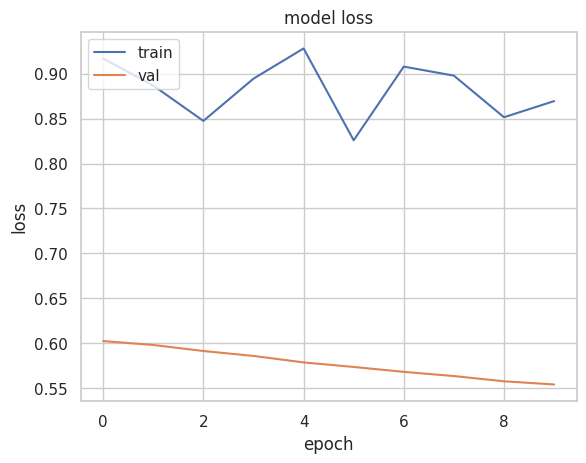

In [714]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Обучает модель на тренировочных данных и визуализирует изменение функции потерь (loss) как для обучающего (train), так и для валидационного (val) наборов данных по эпохам. График позволяет оценить, как модель обучается со временем и выявить возможное переобучение, если валидационная потеря начинает увеличиваться при снижении обучающей потери.

In [715]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5637 - loss: 0.7010 - val_accuracy: 0.6923 - val_loss: 0.6191
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6762 - loss: 0.6193 - val_accuracy: 0.7133 - val_loss: 0.5652
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7308 - loss: 0.5769 - val_accuracy: 0.7483 - val_loss: 0.5293
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7680 - loss: 0.5459 - val_accuracy: 0.7622 - val_loss: 0.4974
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.5052 - val_accuracy: 0.7552 - val_loss: 0.4728
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8011 - loss: 0.4744 - val_accuracy: 0.7762 - val_loss: 0.4528
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8066 - loss: 0.4718 - val_accuracy: 0.7972 - val_loss: 0.4373
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8104 - loss: 0.4463 - val_accuracy: 0.8182 - val_loss: 0.4239
Ep

Создает синтетический набор данных для бинарной классификации и разделяет его на обучающую и тестовую выборки. Затем данные стандартизируются для улучшения сходимости модели. Создается нейронная сеть с двумя скрытыми слоями и выходом для бинарной классификации. Модель компилируется с использованием оптимизатора Adam и обучается на тренировочных данных. Наконец, модель оценивается на тестовом наборе для определения точности.

In [716]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=4, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6647 - loss: 0.6328 - val_accuracy: 0.7972 - val_loss: 0.4553
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.4392 - val_accuracy: 0.8112 - val_loss: 0.4227
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8215 - loss: 0.4023 - val_accuracy: 0.8042 - val_loss: 0.4151
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.4084 - val_accuracy: 0.8182 - val_loss: 0.4126
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3547 - val_accuracy: 0.8042 - val_loss: 0.4084
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.4128 - val_accuracy: 0.8112 - val_loss: 0.4019
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3590 - val_accuracy: 0.8042 - val_loss: 0.4106
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.4069 - val_accuracy: 0.8112 - val_

Разделяет данные на обучающую и тестовую выборки и стандартизирует их для улучшения сходимости модели. Затем создается нейронная сеть с двумя скрытыми слоями и выходным слоем для бинарной классификации. Модель компилируется с использованием оптимизатора Adam и функции потерь 'binary_crossentropy'. Она обучается на тренировочных данных с использованием небольшого размера пакета (batch size) равного 4 и валидационной выборки. Наконец, модель оценивается на тестовом наборе для определения точности.

In [717]:
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam


model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  


model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4896 - loss: 1.0544 - val_accuracy: 0.2797 - val_loss: 0.7465
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4833 - loss: 1.0338 - val_accuracy: 0.3357 - val_loss: 0.7307
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5440 - loss: 1.0535 - val_accuracy: 0.4336 - val_loss: 0.7198
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5379 - loss: 0.9479 - val_accuracy: 0.4825 - val_loss: 0.7118
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5697 - loss: 0.9442 - val_accuracy: 0.5035 - val_loss: 0.7056
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5500 - loss: 0.9804 - val_accuracy: 0.5524 - val_loss: 0.7015
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5083 - loss: 0.9984 - val_accuracy: 0.5594 - val_loss: 0.6968
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5464 - loss: 0.9958 - val_accuracy: 0.5664 - val_loss: 0.6917
Epoch 9

Создает и обучает нейронную сеть для бинарной классификации с использованием нескольких полносвязных слоев и регуляризации Dropout для предотвращения переобучения. Каждый скрытый слой сопровождается нормализацией батча (Batch Normalization), что помогает улучшить стабильность и скорость обучения. Модель компилируется с оптимизатором Adam и функцией потерь 'binary_crossentropy', затем обучается на тренировочных данных и оценивается на тестовом наборе для определения точности.

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5977 - loss: 0.8534 - val_accuracy: 0.6434 - val_loss: 0.6237
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5489 - loss: 0.9050 - val_accuracy: 0.6434 - val_loss: 0.6136
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5889 - loss: 0.9512 - val_accuracy: 0.6503 - val_loss: 0.6059
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5737 - loss: 0.8687 - val_accuracy: 0.6573 - val_loss: 0.5980
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5965 - loss: 0.8138 - val_accuracy: 0.6573 - val_loss: 0.5898
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5791 - loss: 0.9227 - val_accuracy: 0.6573 - val_loss: 0.5828
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6209 - loss: 0.7575 - val_accuracy: 0.6713 - val_loss: 0.5768
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5966 - loss: 0.8652 - val_accuracy: 0.6783 - val_loss:

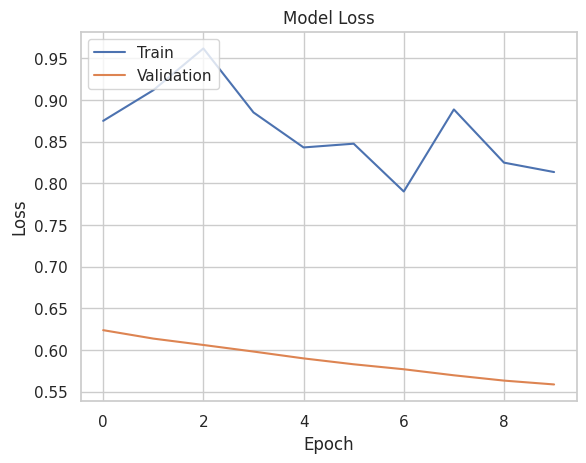

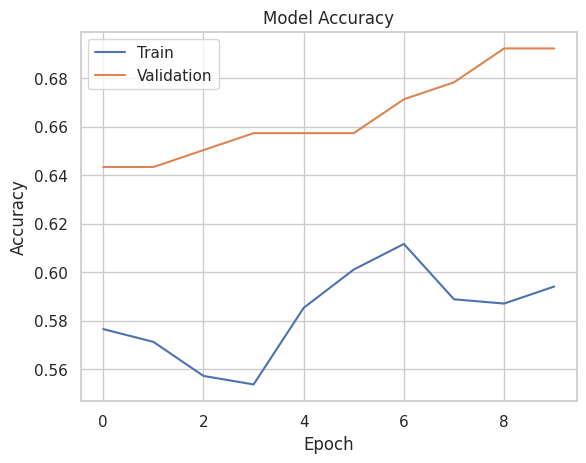

In [718]:
import matplotlib.pyplot as plt


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Обучает нейронную сеть и визуализирует изменения функции потерь и точности как для обучающего (Train), так и для валидационного (Validation) наборов данных по эпохам. Первый график показывает, как функция потерь уменьшается с течением времени, что указывает на улучшение модели, тогда как второй график демонстрирует, как точность модели растет. Эти графики помогают оценить производительность модели и выявить возможное переобучение.

In [719]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


simple_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


simple_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


simple_model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=0)


y_pred = (simple_model.predict(X_test) > 0.5).astype("int32")
initial_accuracy = accuracy_score(y_test, y_pred)

initial_accuracy

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


0.8100558659217877

Разделяет данные на обучающую и тестовую выборки и стандартизирует числовые признаки для улучшения сходимости модели. Затем создается простая нейронная сеть (MLP) с двумя скрытыми слоями и выходным слоем для бинарной классификации. Модель компилируется с использованием оптимизатора Adam и функции потерь 'binary_crossentropy'. Она обучается на тренировочных данных в течение 50 эпох с небольшим размером пакета (batch size) равным 4. После обучения модель оценивается на тестовом наборе данных, и вычисляется точность предсказаний.

In [720]:
from sklearn.linear_model import LogisticRegression

# Модель логистической регрессии
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


log_accuracy = log_model.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {log_accuracy:.2f}')


Logistic Regression Accuracy: 0.83


Создает и обучает модель логистической регрессии на тренировочных данных. После обучения модель оценивается на тестовом наборе, и вычисляется точность предсказаний с использованием метода score(), который возвращает долю правильно классифицированных образцов. Результат выводится на экран в формате процента.

[0]	validation_0-logloss:0.63914	validation_0-error:0.37640	validation_1-logloss:0.65719	validation_1-error:0.41341
[1]	validation_0-logloss:0.61839	validation_0-error:0.37640	validation_1-logloss:0.63603	validation_1-error:0.41341
[2]	validation_0-logloss:0.60108	validation_0-error:0.37640	validation_1-logloss:0.61862	validation_1-error:0.41341
[3]	validation_0-logloss:0.58395	validation_0-error:0.37640	validation_1-logloss:0.60125	validation_1-error:0.41341
[4]	validation_0-logloss:0.56949	validation_0-error:0.23596	validation_1-logloss:0.58636	validation_1-error:0.24581
[5]	validation_0-logloss:0.55512	validation_0-error:0.19663	validation_1-logloss:0.57190	validation_1-error:0.22905
[6]	validation_0-logloss:0.54190	validation_0-error:0.19663	validation_1-logloss:0.55889	validation_1-error:0.22905
[7]	validation_0-logloss:0.52980	validation_0-error:0.19663	validation_1-logloss:0.54715	validation_1-error:0.22905
[8]	validation_0-logloss:0.51870	validation_0-error:0.19663	validation_1

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.39620	validation_0-error:0.16011	validation_1-logloss:0.42444	validation_1-error:0.17877
[35]	validation_0-logloss:0.39441	validation_0-error:0.16011	validation_1-logloss:0.42284	validation_1-error:0.17877
[36]	validation_0-logloss:0.39275	validation_0-error:0.16011	validation_1-logloss:0.42235	validation_1-error:0.17877
[37]	validation_0-logloss:0.39115	validation_0-error:0.16011	validation_1-logloss:0.42154	validation_1-error:0.17877
[38]	validation_0-logloss:0.38947	validation_0-error:0.16011	validation_1-logloss:0.41955	validation_1-error:0.17877
[39]	validation_0-logloss:0.38784	validation_0-error:0.16011	validation_1-logloss:0.41872	validation_1-error:0.17877
[40]	validation_0-logloss:0.38633	validation_0-error:0.16011	validation_1-logloss:0.41736	validation_1-error:0.17877
[41]	validation_0-logloss:0.38491	validation_0-error:0.16011	validation_1-logloss:0.41662	validation_1-error:0.17877
[42]	validation_0-logloss:0.38343	validation_0-error:0.16011	val

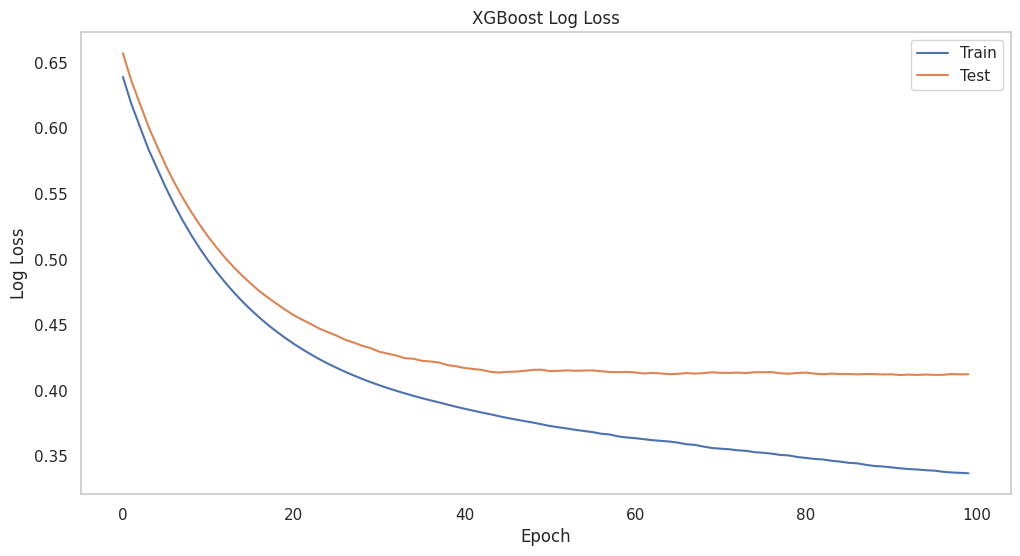

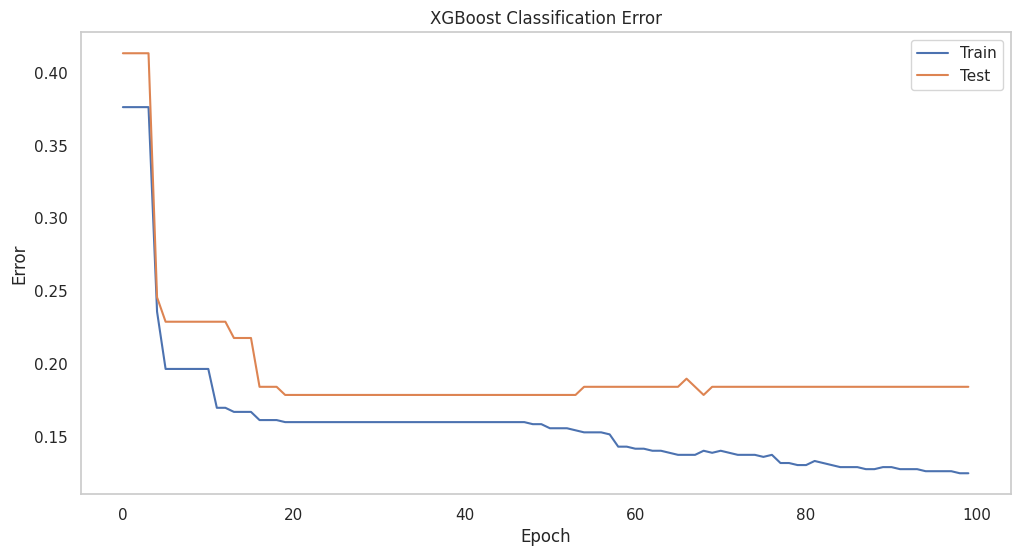

In [721]:
import xgboost as xgb



xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)


eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric=["logloss", "error"], eval_set=eval_set, verbose=True)


results = xgb_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


plt.figure(figsize=(12, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.title('XGBoost Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(x_axis, results['validation_0']['error'], label='Train')
plt.plot(x_axis, results['validation_1']['error'], label='Test')
plt.title('XGBoost Classification Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


Создает и обучает модель XGBoost для классификации с возможностью отслеживания метрик потерь и ошибок в процессе обучения. Модель обучается на тренировочных данных и оценивается на тестовых данных. После обучения визуализируются графики log loss и ошибки для тренировочного и тестового наборов данных по эпохам. Эти графики помогают оценить производительность модели и выявить возможное переобучение.

In [722]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')


Random Forest Accuracy: 0.83


Создает и обучает модель случайного леса для классификации на тренировочных данных. Модель использует 100 деревьев (n_estimators) и фиксирует случайное состояние для воспроизводимости результатов. После обучения модель оценивается на тестовом наборе, и вычисляется точность предсказаний с использованием метода score(), который возвращает долю правильно классифицированных образцов. Результат выводится на экран в формате процента.

In [723]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)


xgb_accuracy = xgb_model.score(X_test, y_test)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')


XGBoost Accuracy: 0.82


Создает и обучает модель XGBoost для классификации на тренировочных данных. Модель использует 100 деревьев (n_estimators), скорость обучения 0.05 и максимальную глубину деревьев 3 для контроля сложности модели. После обучения модель оценивается на тестовом наборе, и вычисляется точность предсказаний с использованием метода score(), который возвращает долю правильно классифицированных образцов. Результат выводится на экран в формате процента.

In [724]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import numpy as np



xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)  

xgb_accuracy = xgb_model.score(X_test, y_test)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  


rf_accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

if xgb_accuracy > rf_accuracy:
    best_model = xgb_model
    best_model_name = 'XGBoost'
else:
    best_model = rf_model
    best_model_name = 'Random Forest'

print(f'Наилучшая модель: {best_model_name} с точностью {max(xgb_accuracy, rf_accuracy):.2f}')


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
y_pred = cross_val_predict(best_model, X, y, cv=cv)


conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()


print(f'Confusion Matrix for {best_model_name}: \n{conf_matrix}')
print(f'Model {best_model_name}: \n'
      f'Предсказала, что погибнет, а по факту не погиб = {fp}\n'
      f'Предсказала, что не погибнет, а по факту погиб = {fn}\n'
      f'Предсказала, что не погибнет, и по факту не погиб = {tn}\n'
      f'Предсказала, что погибнет, и по факту погиб = {tp}\n')


class_report = classification_report(y, y_pred)
print(f'Classification Report for {best_model_name}:\n{class_report}')

XGBoost Accuracy: 0.82
Random Forest Accuracy: 0.83
Наилучшая модель: Random Forest с точностью 0.83
Confusion Matrix for Random Forest: 
[[485  64]
 [ 92 250]]
Model Random Forest: 
Предсказала, что погибнет, а по факту не погиб = 64
Предсказала, что не погибнет, а по факту погиб = 92
Предсказала, что не погибнет, и по факту не погиб = 485
Предсказала, что погибнет, и по факту погиб = 250

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.80      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



Создает и обучает две модели: XGBoost и случайный лес (Random Forest) на тренировочных данных. Затем он оценивает точность каждой модели на тестовом наборе и выбирает лучшую модель на основе точности. После этого выполняется кросс-валидация для выбранной модели с использованием StratifiedKFold для получения предсказаний. Создается матрица ошибок для анализа результатов предсказаний и выводится отчет о классификации для лучшей модели. Это позволяет получить более детальное представление о производительности модели и её способности правильно классифицировать примеры.

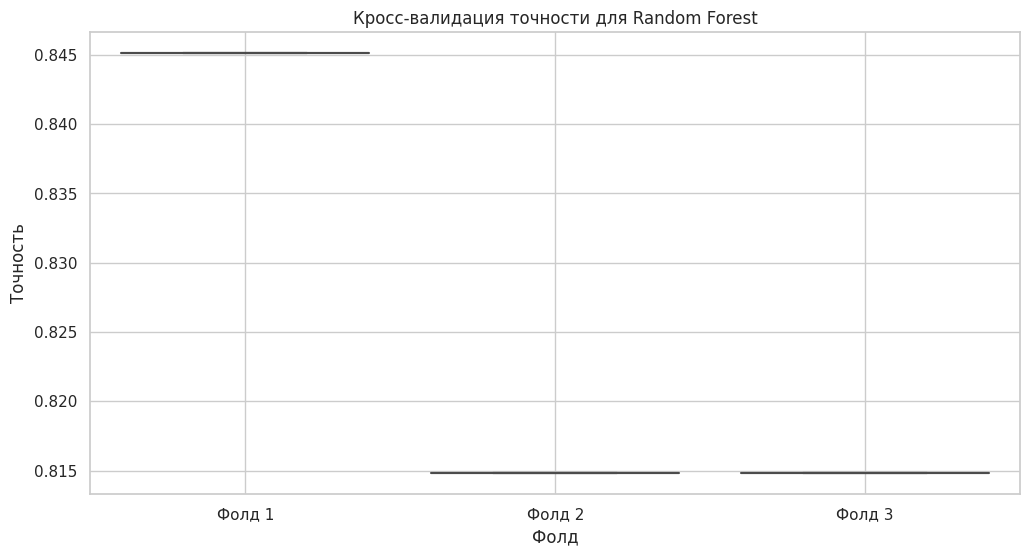

In [725]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = cross_val_score(best_model, X, y, cv=cv)


plt.figure(figsize=(12, 6))
sns.boxplot(x=np.arange(1, cv.get_n_splits() + 1), y=accuracies)
plt.title(f'Кросс-валидация точности для {best_model_name}')
plt.xlabel('Фолд')
plt.ylabel('Точность')
plt.xticks(np.arange(0, cv.get_n_splits(), 1), [f'Фолд {i+1}' for i in range(cv.get_n_splits())])
plt.grid(True)
plt.show()

Выполняет кросс-валидацию для выбранной лучшей модели с использованием StratifiedKFold. Он разделяет данные на три фолда и вычисляет точность модели для каждого фолда. Затем создается график с использованием boxplot для визуализации распределения точности по фолдам. Это позволяет оценить стабильность и надежность модели на различных подвыборках данных.

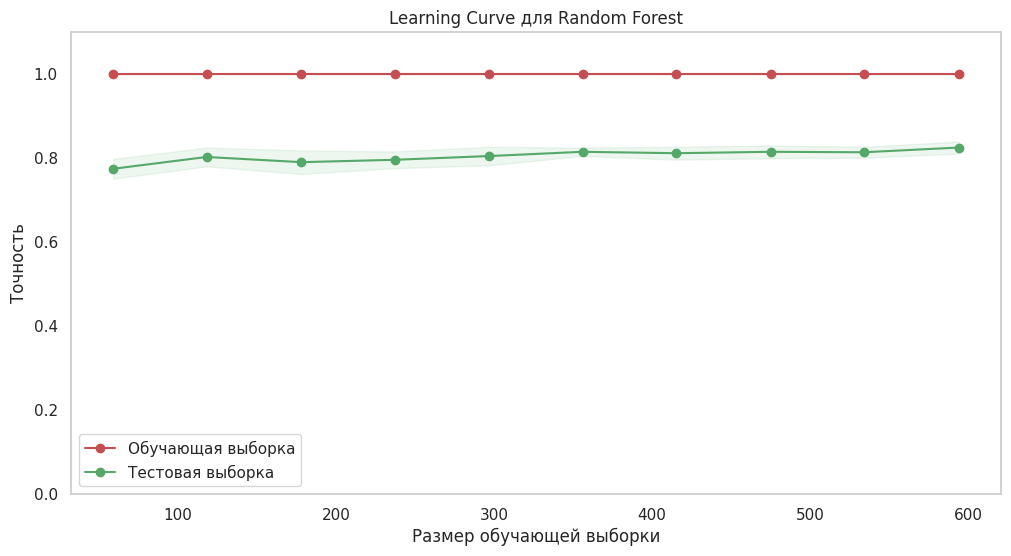

In [726]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(12, 6))
plt.title(f'Learning Curve для {best_model_name}')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность')
plt.ylim(0.0, 1.1)
plt.grid()


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")


plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Обучающая выборка")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Тестовая выборка")
plt.legend(loc="best")
plt.show()

Строит график Learning Curve для выбранной модели. Он вычисляет точность на обучающей и тестовой выборках при различных размерах обучающей выборки с использованием функции learning_curve из sklearn. Затем вычисляются средние значения и стандартные отклонения точности для визуализации стабильности модели. График показывает как увеличивается точность с увеличением размера обучающей выборки и помогает выявить проблемы с переобучением или недообучением.

Модель предсказала, что погибнет, а по факту не погиб = FP (количество ложноположительных предсказаний).
Модель предсказала, что не погибнет, а по факту погиб = FN (количество ложноотрицательных предсказаний).
Модель предсказала, что не погибнет, и по факту не погиб = TN (количество истинноотрицательных предсказаний).
Модель предсказала, что погибнет, и по факту погиб = TP (количество истинноположительных предсказаний).

В результате анализа матрицы ошибок можно оценить качество модели. Высокие значения TP и TN в сочетании с низкими значениями FP и FN указывают на хорошую производительность модели. Если модель имеет высокое количество FP или FN, это может говоритьо необходимости ее доработки или выбора другого подхода к решению задачи.

Лучше всего оказалась рандом форест

Окончательный вывод о проделанный работе:
Созданы 16 графиков, в том числе графики: Распределение пассажиров по классам и выживаемости, Выживание, основанное на сексе, Распределение по возрасту и выживаемость, Размер семьи и выживание, Распределение тарифов по классам и выживанию, Корреляционная матрица числовых признаков, Выживаемость по порту посадк, Выживаемость в зависимости от размера семьи, Зависимость стоимости билета от выживаемости и тд
Были созданы признаки FamileSize, IsAlone, Fare_binned, AgeGroup
Были обучены модели, выявленная лучшая, проделанны все действия